<a href="https://colab.research.google.com/github/MuhsinaPP/MachineLearning/blob/master/crossvalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [6]:
data=load_iris()

In [7]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [10]:
df.shape

(150, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [17]:
x,y=data.data,data.target

In [18]:
classifiers={
    'Decision tree':DecisionTreeClassifier(),
    'Random forest':RandomForestClassifier(),
    'SVM':SVC(),
    'K-neirest neighbors':KNeighborsClassifier(),
    'Naive bayes':GaussianNB(),
    'Logistic regression':LogisticRegression()
}

In [19]:
cv_result={}

In [20]:
for name,clf in classifiers.items():
  scores=cross_val_score(clf,x,y,cv=5)
  cv_result[name]=scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
for name,score in cv_result.items():
  print(f"{name}:{score}")

Decision tree:0.9600000000000002
Random forest:0.9666666666666668
SVM:0.9666666666666666
K-neirest neighbors:0.9733333333333334
Naive bayes:0.9533333333333334
Logistic regression:0.9733333333333334


In [22]:
best_classifier=max(cv_result,key=cv_result.get)
print({best_classifier},":",{cv_result[best_classifier]})

{'K-neirest neighbors'} : {0.9733333333333334}


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
model=KNeighborsClassifier()

In [26]:
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [27]:
model.score(xtest,ytest)

1.0

In [28]:
ypred=np.array(model.predict(xtest))

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

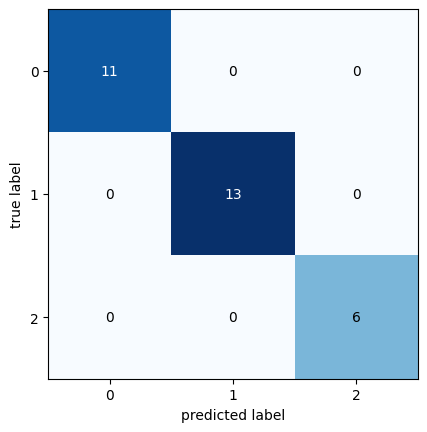

In [29]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(ytest,ypred)
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

In [30]:
from sklearn.metrics import classification_report
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

